## *Learning from Data - Workshop Session 3*
# <br> <center> Data Preprocessing, Regression & Bias-variance Analysis</center>

**Intended Learning Outcomes (ILOs)** for Workshop Session 3:
Upon completion of this unit, you will be able to:
+ Implement the data preprocessing actions (including data cleaning, data transformation, and data virtualisation) on real-world dataset, per the requirement of target data analytics task
+ Develop the linear and polynomial regression models based on real-world dataset
+ Apply the techniques of L1 regularisation and cross validation with a right bias-variance balance

**Dataset** for Advanced Analysis: ["IMDB-top Netflix Programme Dataset"](https://www.kaggle.com/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction/ "IMDB-top Netflix Movies Dataset") (click to download the dataset from Kaggle)
<br> <br> The dataset is scrapped from IMDB about Netflix movies and tv shows.This dataset need clever programming knowledge for feature extraction also building a Netflix programme recommendation system either other prediction models.
<br> <br> **About the Dateset:**
+ MOVIES: The name of movie or tv show
+ YEAR: The year of movie or tv shows telecast for audience
+ GENRE: The type of movie or tv shows
+ RATING: The audience thought about movie or tv show given
+ ONE-LINE: The short description about movie or tv show for audiences first impression
+ STARS: The casting of art which is made talks between audience 
+ VOTES: The number of audience expressing their view
+ RUNTIME: The duration for runing time of art
+ GROSS: The total amount of money earned in worldwide

**Note:**
+ Please run the code below in your Python programming environment. Running on a Jupyter notebook is **highly recommended**, with every few lines of code in a different cell within the notebook.
+ Please select the practical tasks according to your leaning capacity. Feel free to try on the **optional** / **bonus** task, upon the completion of other practices.

### Part A: Review the Structure of Movie Dataset
**1.**	Load the file `movies_dataset.csv` using the python `pandas` library:

In [1]:
import pandas as pd

movies = pd.read_csv('movies_dataset.csv')

# make copy of data as df
df = pd.DataFrame(movies)

**2.** Review the dataset structure

In [2]:
# get shape of data that is (rows count,column count)
print(df.shape)

(9999, 9)


In [3]:
# get 1st few rows from df
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [4]:
# get the mata information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [5]:
# count of null values column wise
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

**3.** **Data Cleaning** - Drop the duplicated data pieces

In [6]:
# drop duplicated rows
df.drop_duplicates(inplace=True)
df.shape

(9568, 9)

In [7]:
# drop duplicated rows with the same movie/tv show name
df.drop_duplicates(subset ="MOVIES",keep = False, inplace = True)
df.shape

(6413, 9)

**4. Data Cleaning** - Remove rows where YEAR, GENRE, RATING, VOTES, RUNTIME AND STARS is NaN

In [8]:
# get the NaN data items
df.rename(columns={'RunTime': 'RUNTIME'}, inplace=True)
filt= (df['YEAR'].isna()) & \
    (df['RATING'].isna()) & \
    (df['VOTES'].isna()) & \
    (df['RUNTIME'].isna())

df_removed_na_attributes = df[filt]
df_removed_na_attributes.shape

(426, 9)

In [9]:
# remove the NaN data items
# (~) bitwise NOT of NAN entries
df =  df[~filt]
# or 
# df = df.drop(df[filt].index)

df.shape

(5987, 9)

**5. Data Transformation** - Transform the features in columns that include '\n'<br> &nbsp; &nbsp; <u>**Hint:**</u> Python String replace() Method

In [10]:
df['GENRE'] = df['GENRE'].str.replace('\n', '')
df['STARS'] = df['STARS'].str.strip()
df['STARS'] = df['STARS'].str.replace('\n', '')
df['YEAR'] = df['YEAR'].str.replace('\n', '')
df['VOTES'] = df['VOTES'].str.replace('\n', '')

**6. Data Transformation** - Remove commas and convert the VOTES column to numeric

In [11]:
df['VOTES'] = df['VOTES'].str.replace(',', '').astype(float)

# Fill missing "Votes" with the mean of "Votes" for movies with the same "Rating"
df['VOTES'].fillna(df.groupby('RATING')['VOTES'].transform('mean'), inplace=True)
df.isnull().sum()

MOVIES         0
YEAR          18
GENRE         34
RATING       507
ONE-LINE       0
STARS          0
VOTES        507
RUNTIME      938
Gross       5538
dtype: int64

**7. Data visulisation** - Analyse the GENRE column

In [12]:
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib as mpl

genre_counts=df['GENRE'].value_counts()
genre_counts

GENRE
Comedy                                        638
Documentary                                   384
Drama                                         361
Animation, Action, Adventure                  186
Comedy, Drama                                 167
                                             ... 
Short, Crime, Drama                             1
Short, Action, Adventure                        1
Documentary, Animation, Sci-Fi                  1
Biography, Music                                1
News, Reality-TV                                1
Name: count, Length: 500, dtype: int64

In [13]:
# count unique genres
newData = movies['GENRE'].str.split(', ')
unique_genres = newData.explode().str.strip().unique()
genre_counts = newData.explode().str.strip().value_counts()
print(unique_genres,genre_counts)

['Action' 'Horror' 'Thriller' 'Animation' 'Adventure' 'Drama' 'Comedy'
 'Crime' 'Romance' 'Mystery' 'Fantasy' 'History' 'Sci-Fi' 'Biography'
 'Family' 'Documentary' 'Music' 'Sport' 'Short' 'Game-Show' 'Reality-TV'
 'Musical' 'War' 'Western' 'Film-Noir' nan 'Talk-Show' 'News'] GENRE
Drama          4325
Comedy         2832
Action         2258
Adventure      1792
Animation      1732
Crime          1566
Documentary    1224
Thriller        910
Mystery         880
Romance         853
Fantasy         572
Horror          553
Family          456
History         372
Reality-TV      370
Short           333
Biography       312
Sci-Fi          310
Music           200
Sport           192
Game-Show        98
Talk-Show        89
Musical          61
War              48
Western          24
News             23
Film-Noir        12
Name: count, dtype: int64


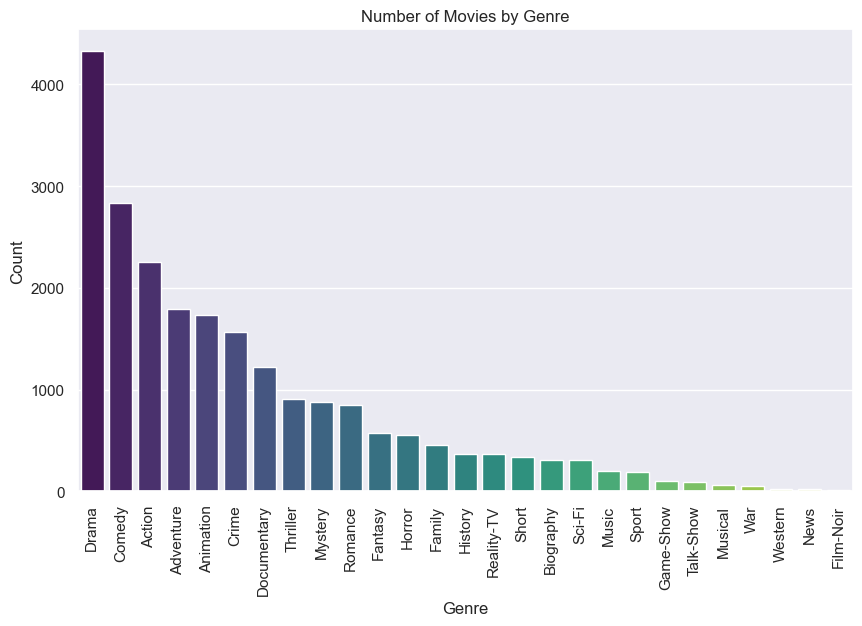

In [14]:
# create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("Number of Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()

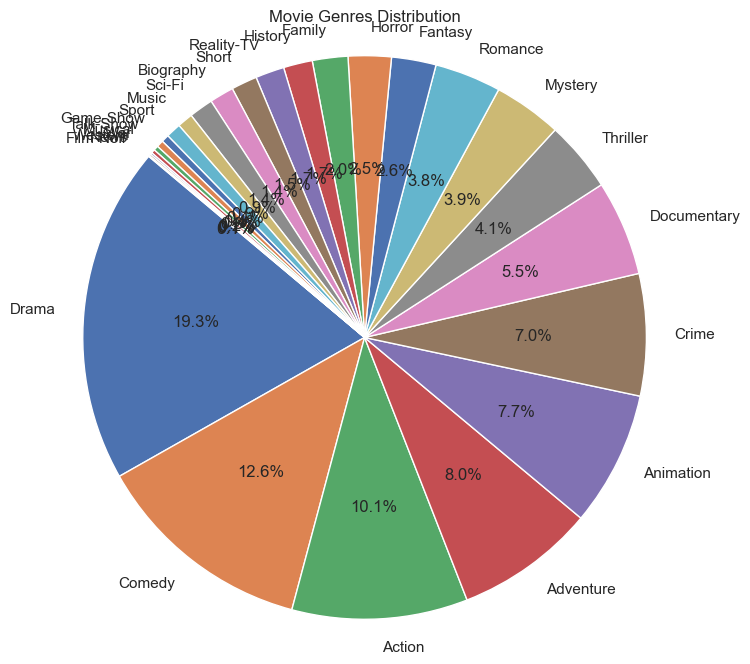

In [15]:
# create a pie chart
genre_data = movies['GENRE']
plt.figure(figsize=(8, 8))
plt.pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Movie Genres Distribution')
plt.axis('equal')

plt.show()

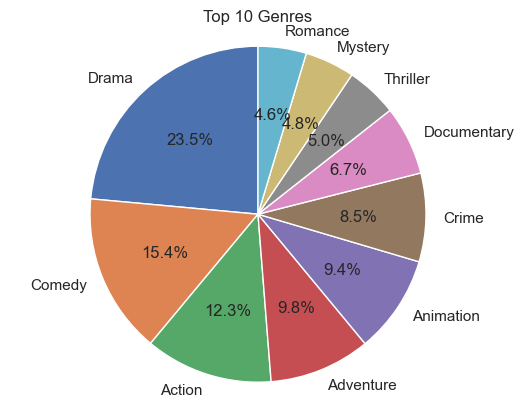

In [16]:
# create a pie chart for top-10 genres
fig, ax = plt.subplots()
ax.pie(genre_counts[:10], labels=genre_counts[:10].index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

ax.set_title('Top 10 Genres')
plt.show()

**8. Data Visualisation** - Analyse the correlation amongst the columns of RATING, RUNTIME, and VOTES

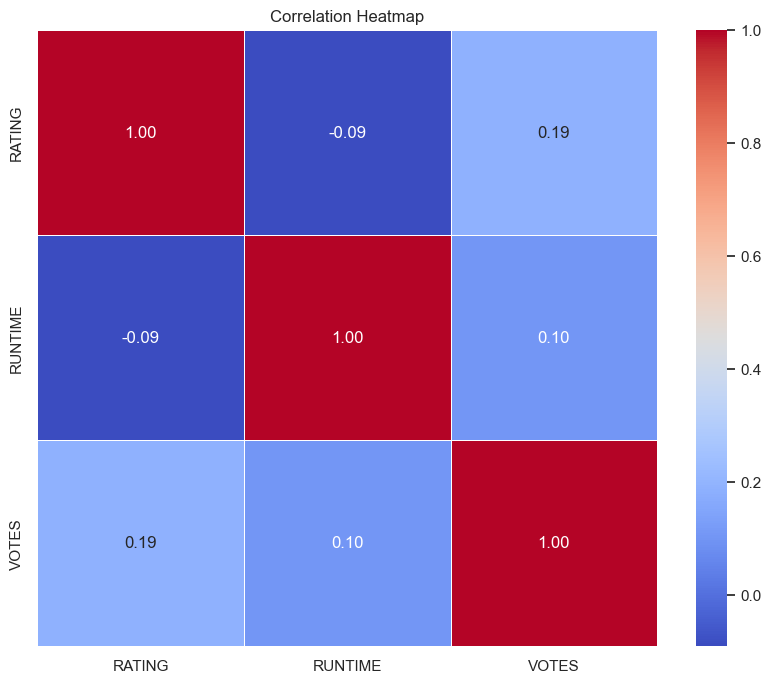

In [17]:
# get the correlation matrix of these three columns
df_insights = df[['RATING', 'RUNTIME',"VOTES"]]
df_insights.describe()

correlation_matrix = df_insights.corr()

# create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**9. Data Transformation [ Optional ]** - Transform the STARS column into separate columns (i.e., DIRECTOR, STARS)

In [18]:
# review the STARS column
pd.set_option('display.max_colwidth', None)
df["STARS"].head(10)

0                Director:Peter Thorwarth|     Stars:Peri Baumeister, Carl Anton Koch, Alexander Scheer, Kais Setti
1                                                 Stars:Chris Wood, Sarah Michelle Gellar, Lena Headey, Mark Hamill
2                                                Stars:Andrew Lincoln, Norman Reedus, Melissa McBride, Lauren Cohan
3                                                Stars:Justin Roiland, Chris Parnell, Spencer Grammer, Sarah Chalke
4    Director:Matthias Schweighöfer|     Stars:Matthias Schweighöfer, Nathalie Emmanuel, Ruby O. Fee, Stuart Martin
5                                                Stars:Chase Stokes, Madelyn Cline, Madison Bailey, Jonathan Daviss
6              Director:Augustine Frizzell|     Stars:Shailene Woodley, Joe Alwyn, Wendy Nottingham, Felicity Jones
7                                               Stars:Michael C. Hall, Jennifer Carpenter, David Zayas, James Remar
8                                      Stars:Maitreyi Ramakrishnan, Poor

<u>**Hint:**</u> re - Regular expression operations &nbsp; https://docs.python.org/3/library/re.html <br>

In [19]:
#creating new columns
import re

def extract_names(row):
    directors = ', '.join(re.findall(r'Director[s]*:\s*([^|]+)', row))
    stars = ', '.join(re.findall(r'Stars*:\s*([^|]+)', row))
    return directors, stars

# applying the function to create separate columns
df[['DIRECTOR', 'STARS']] = df['STARS'].apply(extract_names).apply(pd.Series)

df['DIRECTOR'] = df['DIRECTOR'].str.strip()
df['STARS'] = df['STARS'].str.strip()

# review the dataset after transformation
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RUNTIME,Gross,DIRECTOR
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.,"Peri Baumeister, Carl Anton Koch, Alexander Scheer, Kais Setti",21062.0,121.0,NaN,Peter Thorwarth
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may be the final battle between He-Man and Skeletor. A new animated series from writer-director Kevin Smith.,"Chris Wood, Sarah Michelle Gellar, Lena Headey, Mark Hamill",17870.0,25.0,NaN,
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a coma to learn the world is in ruins and must lead a group of survivors to stay alive.,"Andrew Lincoln, Norman Reedus, Melissa McBride, Lauren Cohan",885805.0,44.0,NaN,
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits of a super scientist and his not-so-bright grandson.,"Justin Roiland, Chris Parnell, Spencer Grammer, Sarah Chalke",414849.0,23.0,NaN,
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"\nA prequel, set before the events of Army of the Dead, which focuses on German safecracker Ludwig Dieter leading a group of aspiring thieves on a top secret heist during the early stages of the zombie apocalypse.","Matthias Schweighöfer, Nathalie Emmanuel, Ruby O. Fee, Stuart Martin",NaN,NaN,NaN,Matthias Schweighöfer


In [20]:
df.isnull().sum()

MOVIES         0
YEAR          18
GENRE         34
RATING       507
ONE-LINE       0
STARS          0
VOTES        507
RUNTIME      938
Gross       5538
DIRECTOR       0
dtype: int64

### Part B: Analyse the Feature Correlation between RATING and GROSS

**1.** Data Proprocessing per the Part B task

In [21]:
# count of null values column wise
df.rename(columns={'Gross': 'GROSS'}, inplace=True)
df.isnull().sum()

MOVIES         0
YEAR          18
GENRE         34
RATING       507
ONE-LINE       0
STARS          0
VOTES        507
RUNTIME      938
GROSS       5538
DIRECTOR       0
dtype: int64

In [22]:
# remove rows where GROSS is NaN
# get the NaN data items
filt= (df['GROSS'].isna())

df_removed_na_attributes = df[filt]
df_removed_na_attributes.shape

(5538, 10)

In [23]:
# remove the NaN data items
# (~) bitwise NOT of NAN entries
df =  df[~filt]
# or 
# df = df.drop(df[filt].index)

df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 77 to 6292
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    449 non-null    object 
 1   YEAR      449 non-null    object 
 2   GENRE     449 non-null    object 
 3   RATING    449 non-null    float64
 4   ONE-LINE  449 non-null    object 
 5   STARS     449 non-null    object 
 6   VOTES     449 non-null    float64
 7   RUNTIME   449 non-null    float64
 8   GROSS     449 non-null    object 
 9   DIRECTOR  449 non-null    object 
dtypes: float64(3), object(7)
memory usage: 38.6+ KB


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RUNTIME,GROSS,DIRECTOR
77,The Hitman's Bodyguard,(2017),"Action, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client, a hitman who must testify at the International Criminal Court. They must put their differences aside and work together to make it to the trial on time.","Ryan Reynolds, Samuel L. Jackson, Gary Oldman, Elodie Yung",205979.0,118.0,$75.47M,Patrick Hughes
85,Jurassic Park,(1993),"Action, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almost complete theme park is tasked with protecting a couple of kids after a power failure causes the park's cloned dinosaurs to run loose.,"Sam Neill, Laura Dern, Jeff Goldblum, Richard Attenborough",897444.0,127.0,$402.45M,Steven Spielberg
95,Don't Breathe,(2016),"Crime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, a trio of thieves break into the house of a blind man who isn't as helpless as he seems.","Stephen Lang, Jane Levy, Dylan Minnette, Daniel Zovatto",237601.0,88.0,$89.22M,Fede Alvarez
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"Action, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron.,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean Bean",1713028.0,178.0,$315.54M,Peter Jackson
125,Escape Room,(I) (2019),"Action, Adventure, Horror",6.4,\nSix strangers find themselves in a maze of deadly mystery rooms and must use their wits to survive.,"Taylor Russell, Logan Miller, Jay Ellis, Tyler Labine",99351.0,99.0,$57.01M,Adam Robitel


In [24]:
# transform the GROSS from string to float
df['GROSS'] = df['GROSS'].str.replace('$','')
df['GROSS'] = df['GROSS'].str.replace('M','').astype(float)
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RUNTIME,GROSS,DIRECTOR
77,The Hitman's Bodyguard,(2017),"Action, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client, a hitman who must testify at the International Criminal Court. They must put their differences aside and work together to make it to the trial on time.","Ryan Reynolds, Samuel L. Jackson, Gary Oldman, Elodie Yung",205979.0,118.0,75.47,Patrick Hughes
85,Jurassic Park,(1993),"Action, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almost complete theme park is tasked with protecting a couple of kids after a power failure causes the park's cloned dinosaurs to run loose.,"Sam Neill, Laura Dern, Jeff Goldblum, Richard Attenborough",897444.0,127.0,402.45,Steven Spielberg
95,Don't Breathe,(2016),"Crime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, a trio of thieves break into the house of a blind man who isn't as helpless as he seems.","Stephen Lang, Jane Levy, Dylan Minnette, Daniel Zovatto",237601.0,88.0,89.22,Fede Alvarez
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"Action, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron.,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean Bean",1713028.0,178.0,315.54,Peter Jackson
125,Escape Room,(I) (2019),"Action, Adventure, Horror",6.4,\nSix strangers find themselves in a maze of deadly mystery rooms and must use their wits to survive.,"Taylor Russell, Logan Miller, Jay Ellis, Tyler Labine",99351.0,99.0,57.01,Adam Robitel


**2.** Make a scatterplot for the RATING and the GROSS columns

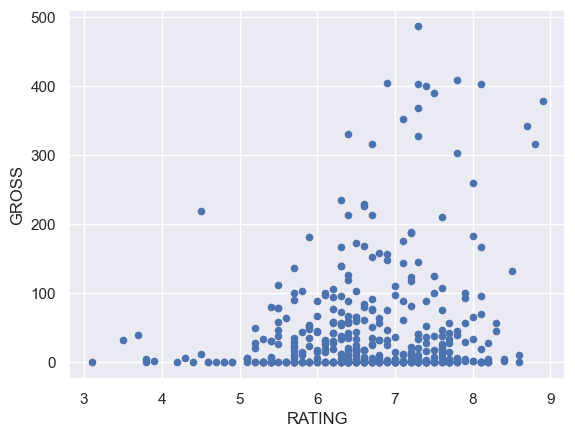

In [30]:
ax = df.plot.scatter(x='RATING', y='GROSS')

**3.** Conduct linear progrssion for the RATING and the GROSS columns

Slope: [13.36702506]
Intercept: -51.337946033298394
R2_train: 0.03181353095634698
R2_test: -0.004316332301528725


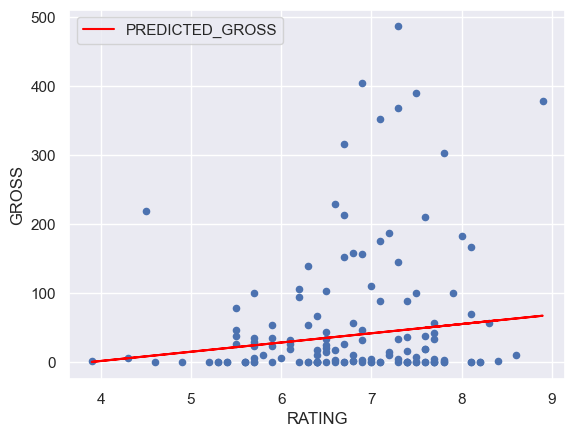

In [31]:
from sklearn.model_selection import train_test_split

X = df[['RATING']]
y = df['GROSS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

print('Slope:', lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)

y_pred = lin_reg.predict(X_test)

movies_test = X_test.copy()

movies_test['GROSS'] = y_test

movies_test['PREDICTED_GROSS'] = y_pred

ax = movies_test.plot.scatter(x='RATING', y='GROSS')

ax = movies_test.plot.line(x='RATING', y='PREDICTED_GROSS', ax=ax, c='red')

R2_train = lin_reg.score(X_train, y_train)
R2_test = lin_reg.score(X_test, y_test)

print('R2_train:', R2_train)
print('R2_test:', R2_test)

**4.** Conduct <u>polynomial regression (degree = 5)</u> for the RATING and the GROSS columns

R2_train: 0.0955748577204053
R2_test: 0.006317123303146044


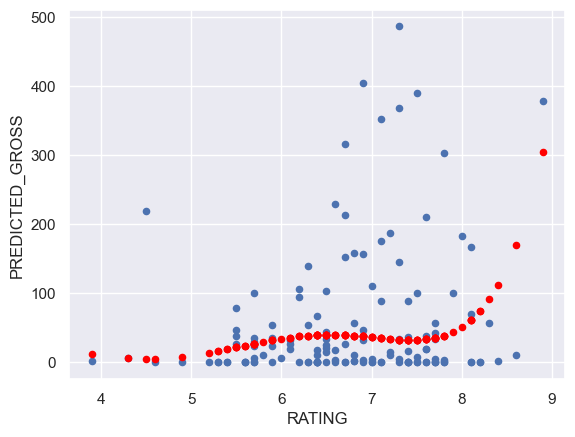

In [32]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
 
poly.fit(X_train_poly, y_train)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Visualising the Polynomial Regression results
movies_test = X_test.copy()

X_test_poly = poly.fit_transform(X_test)
y_pred = poly_reg.predict(X_test_poly)

movies_test['GROSS'] = y_test

movies_test['PREDICTED_GROSS'] = y_pred

ax = movies_test.plot.scatter(x='RATING', y='GROSS')

ax = movies_test.plot.scatter(x='RATING', y='PREDICTED_GROSS', ax=ax, c='red')

R2_train = poly_reg.score(X_train_poly, y_train)
R2_test = poly_reg.score(X_test_poly, y_test)

print('R2_train:', R2_train)
print('R2_test:', R2_test)

**5.** Conduct <u>polynomial regression (degree = 20)</u> for the RATING and the GROSS columns

R2_train: 0.11765361521745854
R2_test: 0.014889875789135698


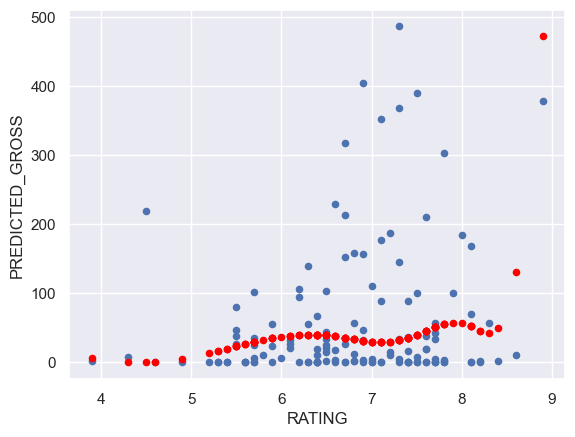

In [33]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree=20)
X_train_poly = poly.fit_transform(X_train)
 
poly.fit(X_train_poly, y_train)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Visualising the Polynomial Regression results
movies_test = X_test.copy()

X_test_poly = poly.fit_transform(X_test)
y_pred = poly_reg.predict(X_test_poly)

movies_test['GROSS'] = y_test

movies_test['PREDICTED_GROSS'] = y_pred

ax = movies_test.plot.scatter(x='RATING', y='GROSS')

ax = movies_test.plot.scatter(x='RATING', y='PREDICTED_GROSS', ax=ax, c='red')

R2_train = poly_reg.score(X_train_poly, y_train)
R2_test = poly_reg.score(X_test_poly, y_test)

print('R2_train:', R2_train)
print('R2_test:', R2_test)

**6.** Conduct <u>ridge regression (degree = 20, alpha=1000000)</u> for the RATING and the GROSS columns

R2_train: 0.11922950556803302
R2_test: 0.023484445050394043


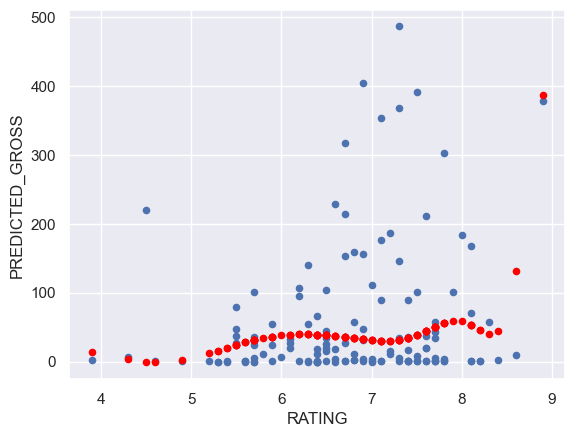

In [34]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1000000)
ridge_reg.fit(X_train_poly, y_train)


# Visualising the Ridge Regression results
movies_test = X_test.copy()

y_pred = ridge_reg.predict(X_test_poly)

movies_test['GROSS'] = y_test

movies_test['PREDICTED_GROSS'] = y_pred

ax = movies_test.plot.scatter(x='RATING', y='GROSS')

ax = movies_test.plot.scatter(x='RATING', y='PREDICTED_GROSS', ax=ax, c='red')

R2_train = ridge_reg.score(X_train_poly, y_train)
R2_test = ridge_reg.score(X_test_poly, y_test)

print('R2_train:', R2_train)
print('R2_test:', R2_test)

## Bonus Task [Challenging]

**Reflection:** In the Practical Task B, the R2 score achieved by ridge regression is still relatively low. Can we improve the gross prediction performance by incorporating more correlation factors (such as, YEAR, GENRE, DIRECTOR, STARS)? Feel free to have a try!

**Inspiration:** <br>
+ **Q1:** How to transform the data representation of GENRE, DIRECTOR, STARS (in string form)?
+ **Q2:** How to build the regression model from multiple feature columns to target prediction column (i.e., GROSS)?
+ **Q3:** How to visualise the regression model from multiple feature columns to target prediction column (i.e., GROSS)?